In [2]:
import os
import sys
import numpy as np 
import open3d as o3d
import matplotlib.pyplot as plt
import pandas as pd
import colorsys

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
# load dataset
#df = pd.read_pickle("../final_dataset.pkl") 
df = pd.read_pickle("../df_jrdb_augmented.pkl") 

In [3]:
df

,positions,poses
0,"[[1.6433, 1.31074, 0.05498], [1.61661, 1.27148...","[[[21.4, 9.8, 2.0], [25.55, 31.25, 2.0], [38.1..."
1,"[[0.83958, -0.50863, 0.045], [0.85848, -0.4422...","[[[563.57, -178.91, 0.0], [587.46, -136.51, 0...."
2,"[[1.53163, 1.33974, 0.03798], [1.52811, 1.3346...","[[[11.24, 23.85, 2.0], [-2.52, 46.95, 0.0], [-..."
3,"[[1.84136, 1.52542, -0.005], [1.83469, 1.50237...","[[[60.4, 70.02, 2.0], [54.05, 88.92, 2.0], [58..."
4,"[[1.72412, 1.30398, -0.01211], [1.69748, 1.244...","[[[68.25, 39.05, 2.0], [69.55, 66.05, 2.0], [7..."
...,...,...
4289,"[[5.968267727453773, 5.490492822033447, -0.065...","[[[-354.86317850622595, 63.36005871571147, 1.0..."
4290,"[[-9.463164342874244, 4.724265857019843, 0.025...","[[[72.55889816272631, 74.74382113199131, 2.0],..."
4291,"[[-3.364940896402999, -0.649425695671161, -0.0...","[[[-135.90354242194445, 721.5244311575088, 2.0..."
4292,"[[-0.497088846780676, 2.0076951175310342, -0.1...","[[[558.0353499688866, -232.6153921929978, 1.0]..."


In [16]:
# load specific track
track_nr = 4100
# get pointcloud
test_pts = df.iloc[track_nr]["positions"]
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(test_pts)

In [5]:
# visualise in 3d
ls_lines = [[i,i+1] for i in range(0,test_pts.shape[0]-1)]
ls_colours = colors = [colorsys.hsv_to_rgb(i / 300., 1.0, 1.0) for i in range(len(ls_lines))]
ls = o3d.geometry.LineSet()
ls.points = o3d.utility.Vector3dVector(test_pts) # shape: (num_points, 3)
ls.lines = o3d.utility.Vector2iVector(ls_lines)   
ls.colors = o3d.utility.Vector3dVector(ls_colours)
o3d.visualization.draw_geometries([ls])

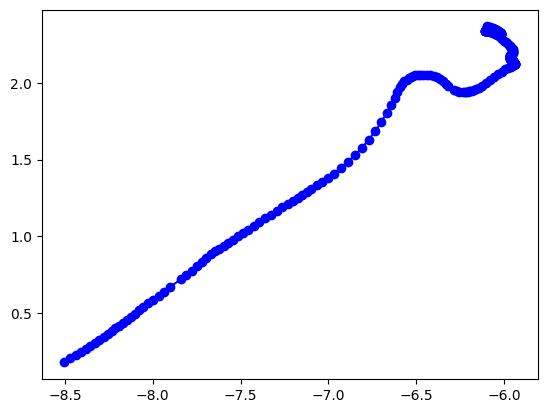

In [17]:
# visualise in 2d
x = test_pts[:,0]
y = test_pts[:,1]
z = test_pts[:,2]
plt.plot(x,y, 'bo-')

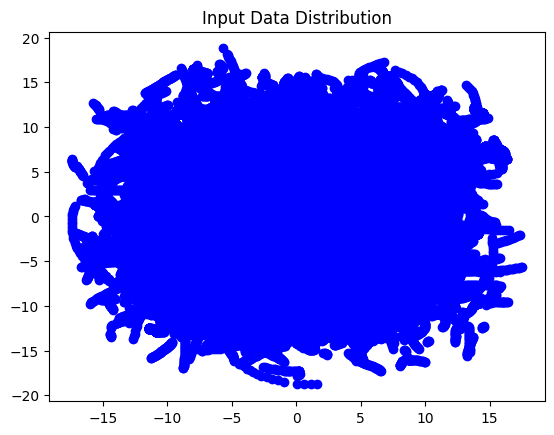

In [36]:
positions = df['positions']
pos_x = []
pos_y = []
for i in positions.iloc[:]:
    pos_x.append(i[:,0])
    pos_y.append(i[:,1])
pos_x = [x for xs in pos_x for x in xs]
pos_y = [y for ys in pos_y for y in ys]

plt.plot(pos_x, pos_y, 'bo')
plt.title('Input Data Distribution')
plt.show()